In [22]:
import numpy as np# Imports 
import numpy as np
import random
from datetime import datetime
import math
import matplotlib.pyplot as plt

In [23]:
# Parameters
n_cities = 10
n_population = 100
mutation_rate = 0.3
random.seed(a = 10) 

In [26]:
# Generating a list of coordenades representing each city
coordinates_list = [[x,y] for x,y in zip(np.random.randint(0,20,n_cities),np.random.randint(0,20,n_cities))]
city = []
for i in range(n_cities):
    city.append(chr(ord('A') + i)) 
names_list = np.array(city)
cities_dict = { x:y for x,y in zip(names_list,coordinates_list)}

# Function to compute the distance between two points
def compute_city_distance_coordinates(a,b):
    return ((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5

def compute_city_distance_names(city_a, city_b, cities_dict):
    return compute_city_distance_coordinates(cities_dict[city_a], cities_dict[city_b])

cities_dict

{'A': [12, 12],
 'B': [4, 6],
 'C': [14, 17],
 'D': [7, 5],
 'E': [10, 2],
 'F': [8, 4],
 'G': [4, 19],
 'H': [13, 13],
 'I': [3, 12],
 'J': [17, 14]}

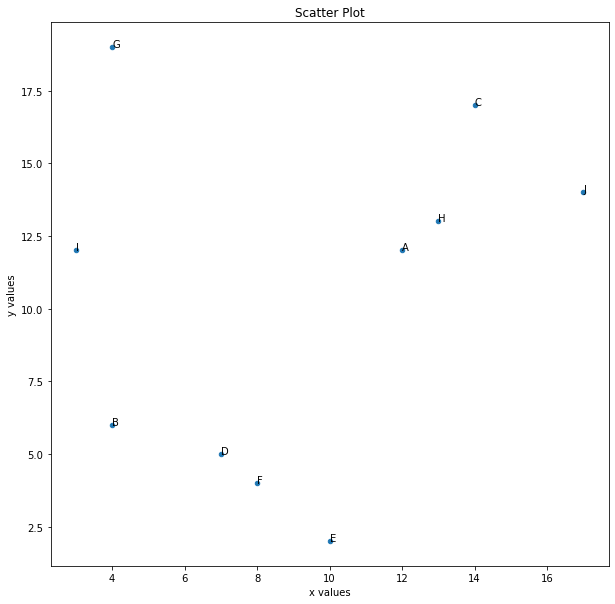

In [27]:
def draw_map(cities_dict,route = [],title = ""):
    x = []
    y = []
    cities = []
    
    for city,coor in cities_dict.items():
        x.append(coor[0])
        y.append(coor[1])
        cities.append(city)
    draw_scatterplot(x,y,cities)
    
    if len(route) != 0:
        for i in range(len(route)-1):
            d_x = [cities_dict[route[i]][0],cities_dict[route[i+1]][0]]
            d_y = [cities_dict[route[i]][1],cities_dict[route[i+1]][1]]
            plt.plot(d_x,d_y)

            distance = compute_city_distance_names(route[i], route[i+1], cities_dict)
            distance = str(round(distance,2))
            
            plt.annotate(distance, (0.5*(d_x[0]+d_x[1])+1,0.5*(d_y[0]+d_y[1])+1))
            
        for i,city in enumerate(route):
            plt.annotate(str(i)+". "+city, (cities_dict[route[i]][0], cities_dict[route[i]][1]))
    else:
        for i,city in enumerate(cities):
            plt.annotate(city, (x[i], y[i]))
            
    if len(title) != 0:
        plt.title(title)
    plt.show()
    
def draw_scatterplot(x_values, y_values,cities):
    plt.figure(figsize=(10,10))
    plt.scatter(x_values, y_values, s=20)
    plt.title("Scatter Plot")
    plt.xlabel("x values")
    plt.ylabel("y values")

draw_map(cities_dict)

In [5]:
# First step: Create the first population set
def genesis(city_list, n_population):

    population_set = []
    for i in range(n_population):
        #Randomly generating a new solution
        sol_i = city_list[np.random.choice(list(range(n_cities)), n_cities, replace=False)]
        population_set.append(sol_i)
    return np.array(population_set)

population_set = genesis(names_list, n_population)
population_set

array([['G', 'J', 'D', 'E', 'F', 'I', 'B', 'A', 'H', 'C'],
       ['A', 'C', 'E', 'F', 'I', 'J', 'H', 'D', 'G', 'B'],
       ['J', 'C', 'F', 'A', 'I', 'D', 'H', 'E', 'G', 'B'],
       ['D', 'G', 'E', 'F', 'C', 'B', 'H', 'I', 'J', 'A'],
       ['A', 'D', 'C', 'B', 'I', 'H', 'G', 'J', 'E', 'F'],
       ['E', 'C', 'H', 'G', 'B', 'D', 'J', 'I', 'A', 'F'],
       ['B', 'E', 'I', 'C', 'J', 'D', 'F', 'G', 'H', 'A'],
       ['C', 'B', 'H', 'I', 'G', 'D', 'E', 'F', 'J', 'A'],
       ['A', 'G', 'D', 'C', 'E', 'I', 'B', 'J', 'F', 'H'],
       ['B', 'D', 'H', 'F', 'E', 'J', 'I', 'G', 'C', 'A'],
       ['G', 'E', 'I', 'J', 'C', 'D', 'A', 'F', 'B', 'H'],
       ['C', 'F', 'G', 'I', 'J', 'D', 'E', 'B', 'A', 'H'],
       ['J', 'G', 'E', 'B', 'D', 'I', 'A', 'H', 'F', 'C'],
       ['C', 'I', 'F', 'A', 'G', 'B', 'D', 'J', 'E', 'H'],
       ['G', 'C', 'I', 'J', 'B', 'E', 'D', 'F', 'H', 'A'],
       ['A', 'I', 'C', 'B', 'H', 'E', 'J', 'G', 'F', 'D'],
       ['H', 'B', 'G', 'I', 'F', 'C', 'E', 'J', 'A', 'D'

In [6]:
# 2. Evaluation of the fitness

#individual solution
def fitness_eval(city_list, cities_dict):
    total = 0
    for i in range(n_cities-1):
        a = city_list[i]
        b = city_list[i+1]
        total += compute_city_distance_names(a,b, cities_dict)
    return total

In [7]:
#All solutions
def get_all_fitnes(population_set, cities_dict,n_population):
    fitnes_list = np.zeros(n_population)

    #Looping over all solutions computing the fitness for each solution
    for i in  range(n_population):
        fitnes_list[i] = fitness_eval(population_set[i], cities_dict)

    return fitnes_list
                   
fitnes_list = get_all_fitnes(population_set,cities_dict,n_population)
len(fitnes_list)

100

In [8]:
# 3. Selecting the progenitors
## 3a. Roulette selection
def roulette_selection(population_set,fitnes_list):
    total_fit = fitnes_list.sum()
    prob_list = fitnes_list/total_fit

    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)

    progenitor_list_a = population_set[progenitor_list_a]
    progenitor_list_b = population_set[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])


progenitor_list = roulette_selection(population_set,fitnes_list)
progenitor_list[0][2]

array(['B', 'I', 'F', 'C', 'D', 'G', 'E', 'J', 'A', 'H'], dtype='<U1')

In [9]:
## 3b. Tournament Selection
def tournament_selection(population_set, fitnes_list):
    progenitor_list = [[],[]]
    for i in range(2):
        temp_list_a = np.random.choice(list(range(len(population_set))), len(population_set), replace=True)
        temp_list_b = np.random.choice(list(range(len(population_set))), len(population_set), replace=True)
        for j in range(len(temp_list_a)):
            fitnes_a = fitnes_list[temp_list_a[i]]
            fitnes_b = fitnes_list[temp_list_b[i]]
            if fitnes_b>fitnes_a:
                temp_list_a[i] = temp_list_b[i]
        progenitor_list[i] = temp_list_a.copy()
        
    progenitor_list[0] = population_set[progenitor_list[0]]
    progenitor_list[1] = population_set[progenitor_list[1]]
    return np.array(progenitor_list)

progenitor_list = tournament_selection(population_set,fitnes_list)
progenitor_list

array([[['C', 'F', 'A', ..., 'D', 'B', 'E'],
        ['F', 'I', 'G', ..., 'H', 'A', 'C'],
        ['B', 'C', 'A', ..., 'E', 'D', 'H'],
        ...,
        ['J', 'G', 'E', ..., 'H', 'F', 'C'],
        ['F', 'H', 'A', ..., 'D', 'B', 'G'],
        ['I', 'F', 'H', ..., 'D', 'E', 'C']],

       [['J', 'G', 'F', ..., 'A', 'H', 'D'],
        ['G', 'H', 'I', ..., 'F', 'B', 'D'],
        ['F', 'H', 'A', ..., 'D', 'B', 'G'],
        ...,
        ['H', 'I', 'J', ..., 'G', 'A', 'C'],
        ['C', 'I', 'F', ..., 'J', 'E', 'H'],
        ['J', 'I', 'C', ..., 'D', 'E', 'B']]], dtype='<U1')

In [10]:
## 3c. Rank Based Wheel Selection
def rank_selection(population_set, fitnes_list):
    n = len(population_set)
    total = n*(n+1)/2

    fitnes_list, population_set = zip(*sorted(zip(fitnes_list, population_set), key=lambda x: x[0]))
    prob_list = np.arange(1,len(population_set)+1,1,float)/total
    
    #Notice there is the chance that a progenitor. mates with oneself
    progenitor_list_a = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    progenitor_list_b = np.random.choice(list(range(len(population_set))), len(population_set),p=prob_list, replace=True)
    
    progenitor_list_a = np.array(population_set)[progenitor_list_a]
    progenitor_list_b = np.array(population_set)[progenitor_list_b]
    
    
    return np.array([progenitor_list_a,progenitor_list_b])

progenitor_list = rank_selection(population_set,fitnes_list)
progenitor_list

array([[['C', 'F', 'B', ..., 'D', 'A', 'H'],
        ['C', 'F', 'A', ..., 'D', 'B', 'E'],
        ['B', 'E', 'G', ..., 'H', 'F', 'J'],
        ...,
        ['J', 'G', 'F', ..., 'A', 'H', 'D'],
        ['H', 'A', 'J', ..., 'F', 'I', 'D'],
        ['G', 'J', 'D', ..., 'F', 'E', 'I']],

       [['J', 'G', 'H', ..., 'D', 'I', 'B'],
        ['F', 'I', 'G', ..., 'H', 'A', 'C'],
        ['A', 'I', 'C', ..., 'G', 'F', 'D'],
        ...,
        ['B', 'A', 'F', ..., 'E', 'D', 'G'],
        ['G', 'A', 'E', ..., 'I', 'J', 'H'],
        ['H', 'I', 'J', ..., 'G', 'A', 'C']]], dtype='<U1')

In [11]:
# 3d Elite Selection（with Tournament Selection)
def elite_selection(population_set, fitnes_list,select = 0.1):
    n = len(population_set)
    select = int(n*select)
    
    fitnes_list_sorted, population_set_sorted = zip(*sorted(zip(fitnes_list, population_set), key=lambda x: x[0],reverse = True))
    elite = np.array(population_set_sorted[:select])
    
    progenitor_list = [[],[]]
    for i in range(2):
        temp_list_a = np.random.choice(list(range(len(population_set))), n-select, replace=True)
        temp_list_b = np.random.choice(list(range(len(population_set))), n-select, replace=True)
        for j in range(len(temp_list_a)):
            fitnes_a = fitnes_list[temp_list_a[i]]
            fitnes_b = fitnes_list[temp_list_b[i]]
            if fitnes_b>fitnes_a:
                temp_list_a[i] = temp_list_b[i]
        progenitor_list[i]=temp_list_a.copy()
    
    
    
    progenitor_list[0] = population_set[progenitor_list[0]]
    progenitor_list[1] = population_set[progenitor_list[1]]

    #Append Elite
    
    progenitor_list[0] = np.vstack([progenitor_list[0],elite])
    progenitor_list[1] = np.vstack([progenitor_list[1],elite])

    return np.array(progenitor_list)
    
progenitor_list = elite_selection(population_set,fitnes_list)
progenitor_list[0].shape

(100, 10)

In [12]:
# Pairs crossover
## 4a One-point Crossover Method
def one_point_crossover(prog_a, prog_b):
    n = int(len(prog_a)/2)
    offspring = prog_a[:n]

    for city in prog_b:

        if not city in offspring:
            offspring = np.concatenate((offspring,[city]))

    return offspring

## 4b Multi-point Crossover Method
### Use 3 points
def multi_point_crossover(prog_a, prog_b,multi_point = 3):
    n = np.random.choice(list(range(1,len(prog_a)+1)), multi_point, replace=False)
    n = np.sort(n)
    offspring = prog_a[:n[0]]

    flag = 1
    point = n[0]
    point_b = n[0]
    point_a = n[0]
    for i in range(1,len(n)):
        temp = 0
        if flag == 1:
            flag = 0
            for city in prog_b[point_b:]:
                if not city in offspring:
                    offspring = np.concatenate((offspring,[city]))
                    temp += 1
                    point += 1
                    if point == n[i]:
                        point_b += temp
                        break
        else:
            flag = 1
            for city in prog_a[point_a:]:
                if not city in offspring:
                    offspring = np.concatenate((offspring,[city]))
                    temp += 1
                    point += 1
                    if point == n[i]:
                        point_b += temp
                        break
    while len(offspring) != len(prog_a):
        if flag == 1:
            for city in prog_b:
                if not city in offspring:
                    offspring = np.concatenate((offspring,[city]))
                    if len(offspring) == len(prog_a):
                        break
        else:
            for city in prog_a:
                if not city in offspring:
                    offspring = np.concatenate((offspring,[city]))
                    if len(offspring) == len(prog_a):
                        break
            
    return offspring
            
## 4c Uniform Crossover
### Because we don't figure out the method to generate mask, so we don't do it at all


# Finding pairs of mates
def mate_population(progenitor_list,cro_m = 1):
    new_population_set = []
    for i in range(progenitor_list.shape[1]):
        prog_a, prog_b = progenitor_list[0][i], progenitor_list[1][i]
        offspring = multi_point_crossover(prog_a, prog_b,multi_point = cro_m)
        new_population_set.append(offspring)
        
    return new_population_set

new_population_set = mate_population(progenitor_list)
new_population_set[0]

array(['C', 'I', 'F', 'A', 'G', 'B', 'D', 'H', 'J', 'E'], dtype='<U1')

In [13]:
#Offspring production
## 5a Swap
def swap_mutate(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)
        
        offspring[a], offspring[b] = offspring[b], offspring[a]
    return offspring

## 5b Scramble = shuffle a part
def scramble_mutate(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)
        if b<a:
            temp = a
            a = b
            b = temp

        for i in range(20):
            x = np.random.randint(a,b+1)
            y = np.random.randint(a,b+1)
            offspring[x], offspring[y] = offspring[y], offspring[x]

    return offspring
    
## 5c Inversion
def inversion_mutate(offspring):
    for q in range(int(n_cities*mutation_rate)):
        a = np.random.randint(0,n_cities)
        b = np.random.randint(0,n_cities)
        if b<a:
            temp = a
            a = b
            b = temp
        
        x = math.floor((b-a+1)/2)
        for i in range(x):
            offspring[a+i], offspring[b-i] = offspring[b-i], offspring[a+i] 
    

    return offspring
    
# New population generation
def mutate_population(new_population_set,mut_m = 0):
    mutated_pop = []
    for offspring in new_population_set:
        if mut_m == 0:
            mutated_pop.append(swap_mutate(offspring))
        elif mut_m == 1:
            mutated_pop.append(scramble_mutate(offspring))
        elif mut_m == 2:
            mutated_pop.append(inversion_mutate(offspring))
    return mutated_pop
mutated_pop = mutate_population(new_population_set)
mutated_pop[0]

array(['C', 'I', 'B', 'A', 'G', 'F', 'D', 'H', 'J', 'E'], dtype='<U1')

In [17]:
selection = ["Roulette Wheel Selection","Tournament Selection","Rank Based Wheel Selection","Elite Selection"]
crossover = ["One-point Crossover","Two-point Crossover","Three-point Crossover"]
mutation = ["Swap Mutation","Scramble Mutation","Inversion Mutation"]

In [18]:
# Everything put together
def test(cities_dict,population_set,fitnes_list,mutated_pop,n_population,sel_m = 0,cro_m = 0,mut_m = 0):
    best_solution = [-1,np.inf,np.array([])]
    print(f"Selection used:{selection[sel_m]}")
    print(f"Crossover:{crossover[cro_m-1]}")
    print(f"Mutation:{mutation[mut_m]}")
    for i in range(2000):
        if i%500==0: print(i, fitnes_list.min(), fitnes_list.mean(), datetime.now().strftime("%d/%m/%y %H:%M"))
        fitnes_list = get_all_fitnes(mutated_pop,cities_dict,n_population)

        #Saving the best solution
        if fitnes_list.min() < best_solution[1]:
            best_solution[0] = i
            best_solution[1] = fitnes_list.min()
            best_solution[2] = np.array(mutated_pop)[fitnes_list.min() == fitnes_list]

        #Selection
        if sel_m == 0:
            progenitor_list = roulette_selection(population_set,fitnes_list)
        elif sel_m == 1:
            progenitor_list = tournament_selection(population_set,fitnes_list)
        elif sel_m == 2:
            progenitor_list = rank_selection(population_set,fitnes_list)
        elif sel_m == 3:
            progenitor_list = elite_selection(population_set,fitnes_list)

        # Mating/Crossover
        new_population_set = mate_population(progenitor_list,cro_m=cro_m)

        # Mutation
        mutated_pop = mutate_population(new_population_set,mut_m = mut_m)
        
    return best_solution

In [19]:
best_solution = []
for i in range(len(selection)):
    for j in range(1,len(crossover)+1):
        for k in range(0,len(mutation)):
            best_solution.append(test(cities_dict,population_set,fitnes_list,mutated_pop,n_population,sel_m=i,cro_m=j,mut_m=k))
            print()

Selection used:Roulette Wheel Selection
Crossover:One-point Crossover
Mutation:Swap Mutation
0 40.76005437288671 76.11520143391375 29/10/22 01:02
500 49.17558729372355 75.83760566893488 29/10/22 01:02
1000 48.80750927720484 74.02901203564552 29/10/22 01:02
1500 48.667183207857775 74.65709726638237 29/10/22 01:02

Selection used:Roulette Wheel Selection
Crossover:One-point Crossover
Mutation:Scramble Mutation
0 40.76005437288671 76.11520143391375 29/10/22 01:02
500 51.76712855276496 76.76183886176239 29/10/22 01:03
1000 45.770553383081804 76.14598028542584 29/10/22 01:03
1500 49.11031258168933 74.47662541186124 29/10/22 01:04

Selection used:Roulette Wheel Selection
Crossover:One-point Crossover
Mutation:Inversion Mutation
0 40.76005437288671 76.11520143391375 29/10/22 01:04
500 41.76005437288671 74.87036102213634 29/10/22 01:04
1000 48.868501894693715 76.74228815328946 29/10/22 01:04
1500 43.73741890389853 76.10933098823945 29/10/22 01:04

Selection used:Roulette Wheel Selection
Crosso


Selection used:Rank Based Wheel Selection
Crossover:Three-point Crossover
Mutation:Inversion Mutation
0 40.76005437288671 76.11520143391375 29/10/22 01:27
500 45.10023817206294 75.87379579770698 29/10/22 01:27
1000 47.67475119873021 74.32883987481817 29/10/22 01:27
1500 53.22918709253298 78.25622837174944 29/10/22 01:27

Selection used:Elite Selection
Crossover:One-point Crossover
Mutation:Swap Mutation
0 40.76005437288671 76.11520143391375 29/10/22 01:27
500 49.512656375283306 74.27156441917677 29/10/22 01:27
1000 60.850879309256534 76.19455829274018 29/10/22 01:27
1500 54.591649880340455 75.29421629225253 29/10/22 01:28

Selection used:Elite Selection
Crossover:One-point Crossover
Mutation:Scramble Mutation
0 40.76005437288671 76.11520143391375 29/10/22 01:28
500 50.42937222017208 74.31429250729047 29/10/22 01:28
1000 51.7588153943284 76.33145318677228 29/10/22 01:29
1500 52.00593561290073 77.7801135309291 29/10/22 01:29

Selection used:Elite Selection
Crossover:One-point Crossover


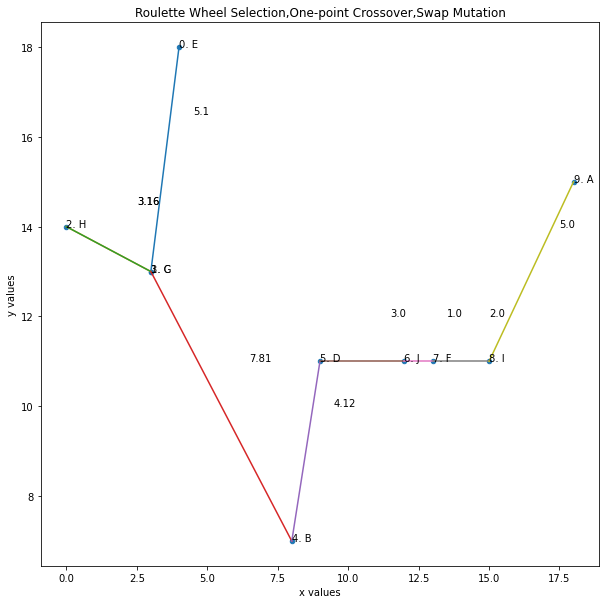

[377, 34.35693013545386, array([['E', 'C', 'H', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


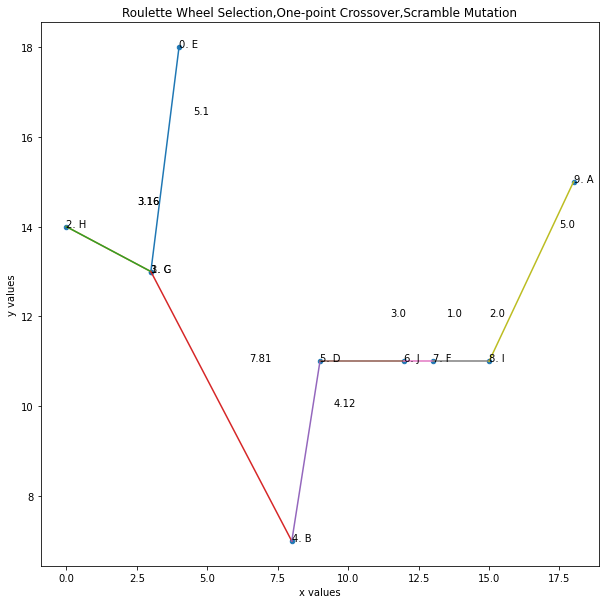

[809, 33.75248721118508, array([['E', 'H', 'G', 'C', 'B', 'D', 'F', 'J', 'I', 'A']], dtype='<U1')]


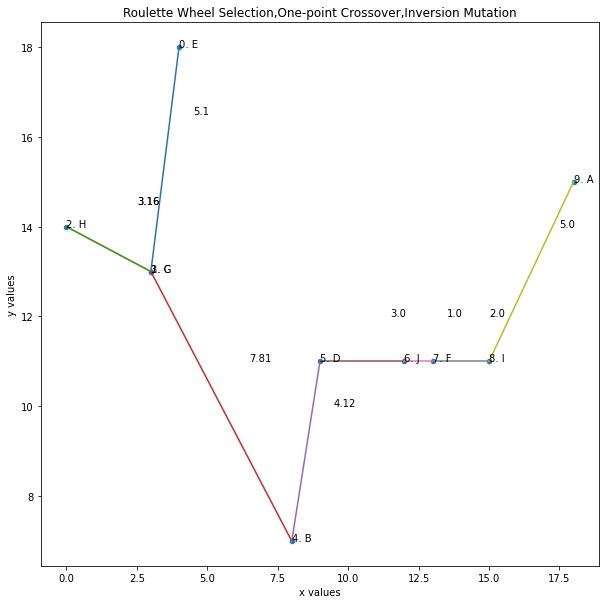

[606, 34.35693013545386, array([['E', 'C', 'H', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


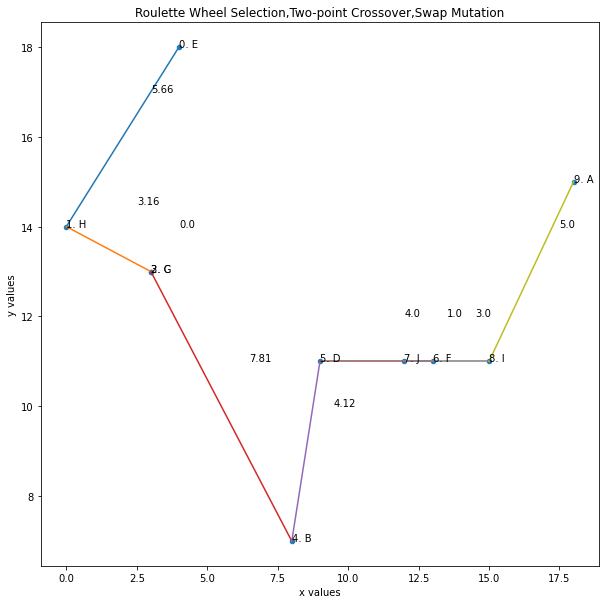

[26, 33.689229064609485, array([['A', 'I', 'F', 'J', 'D', 'B', 'C', 'G', 'E', 'H']], dtype='<U1')]


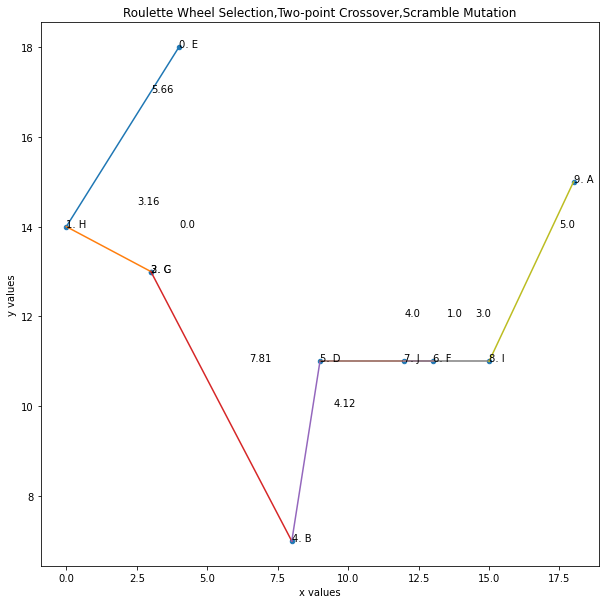

[721, 31.752487211185077, array([['E', 'H', 'C', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


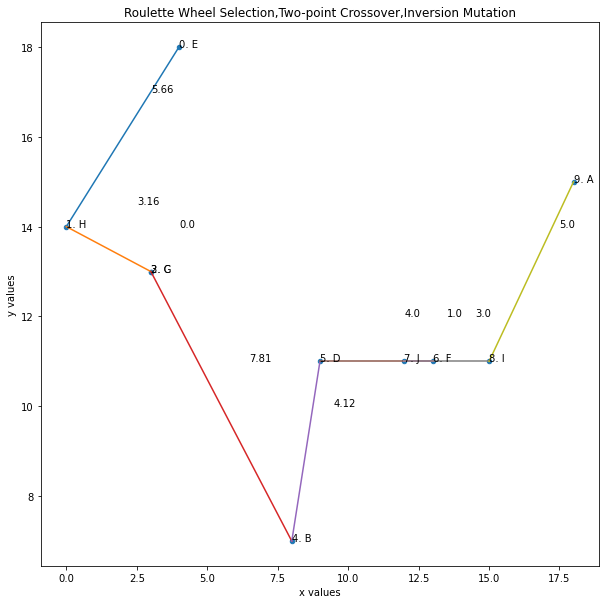

[1859, 34.01454861211347, array([['E', 'G', 'C', 'H', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


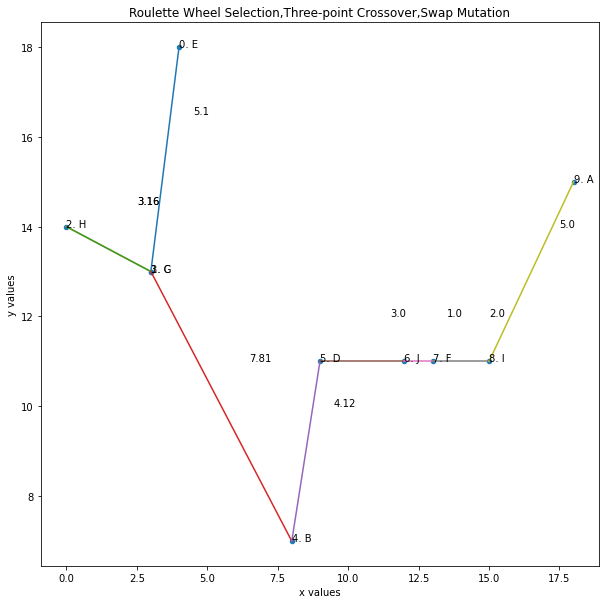

[1863, 31.752487211185077, array([['E', 'H', 'C', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


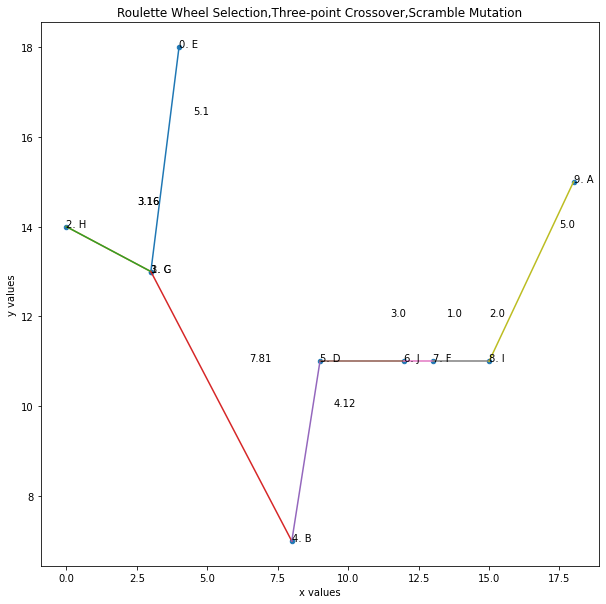

[33, 33.75248721118508, array([['E', 'H', 'C', 'G', 'B', 'D', 'F', 'J', 'I', 'A']], dtype='<U1')]


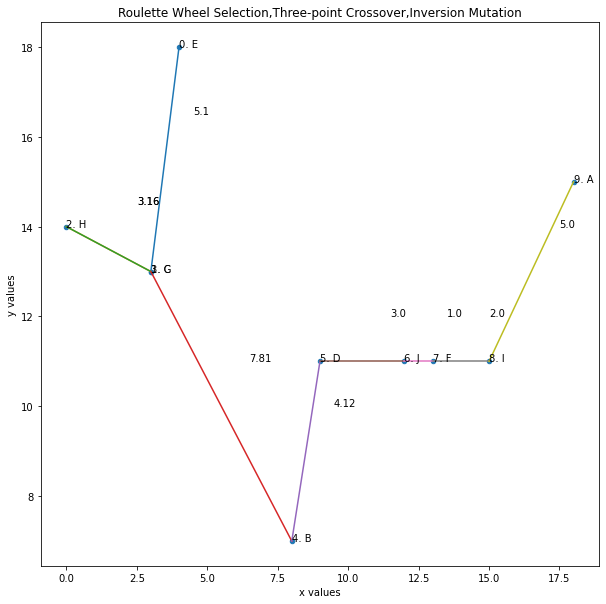

[1387, 31.752487211185073, array([['A', 'I', 'F', 'J', 'D', 'B', 'G', 'C', 'H', 'E']], dtype='<U1')]


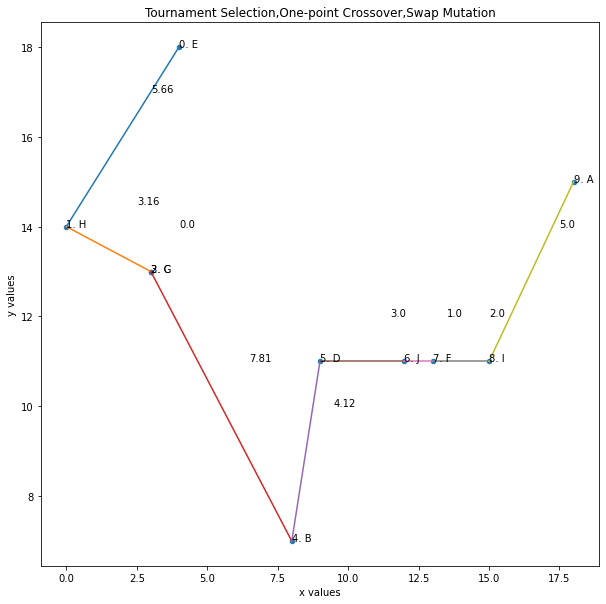

[721, 31.752487211185077, array([['E', 'H', 'C', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


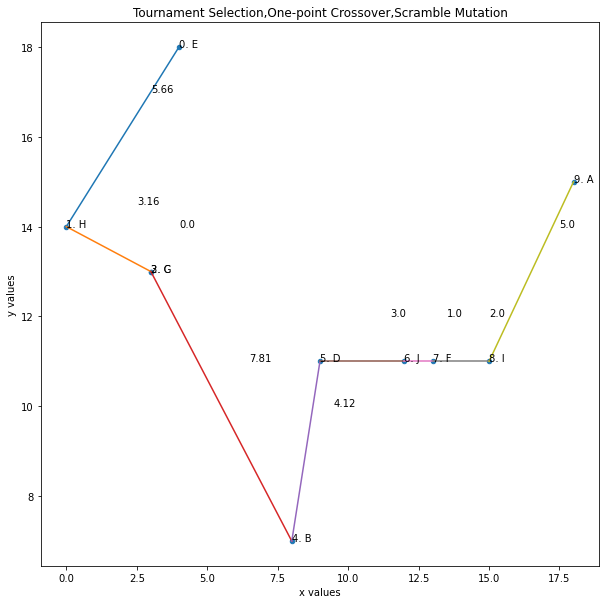

[1859, 34.01454861211347, array([['E', 'G', 'C', 'H', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


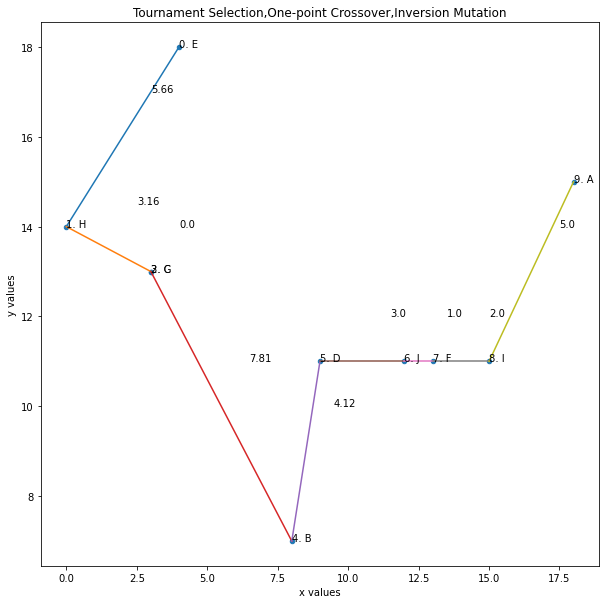

[1863, 31.752487211185077, array([['E', 'H', 'C', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


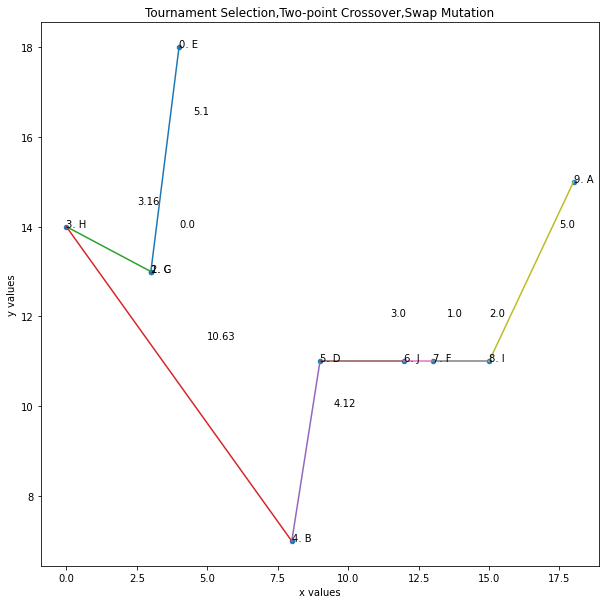

[33, 33.75248721118508, array([['E', 'H', 'C', 'G', 'B', 'D', 'F', 'J', 'I', 'A']], dtype='<U1')]


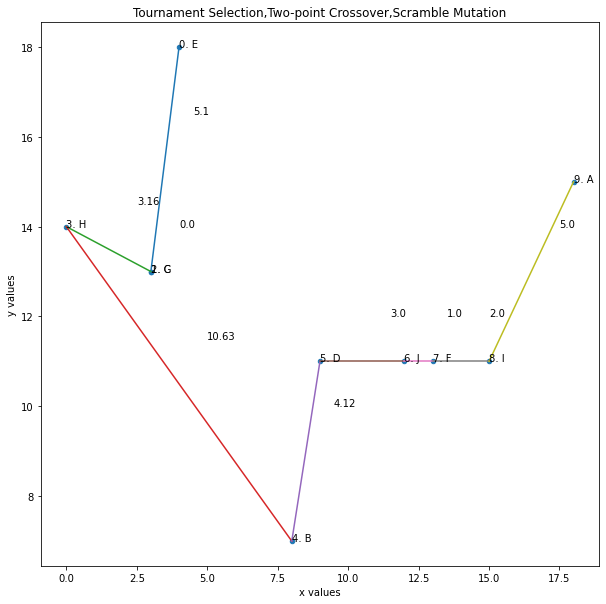

[1387, 31.752487211185073, array([['A', 'I', 'F', 'J', 'D', 'B', 'G', 'C', 'H', 'E']], dtype='<U1')]


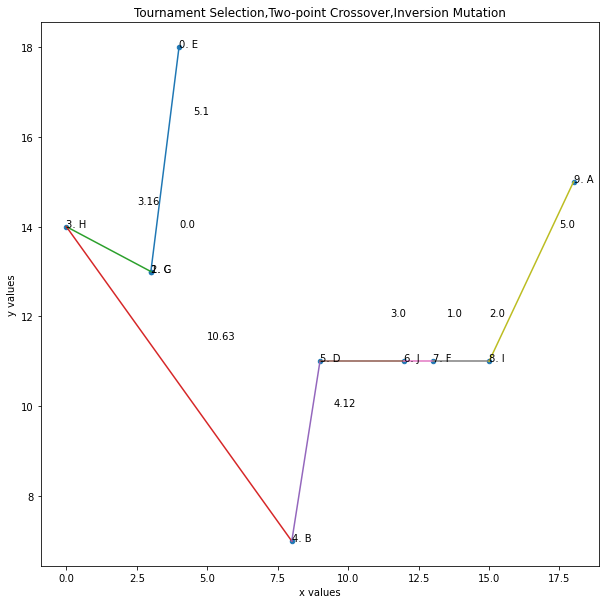

[335, 33.75248721118508, array([['E', 'H', 'C', 'G', 'B', 'D', 'F', 'J', 'I', 'A']], dtype='<U1')]


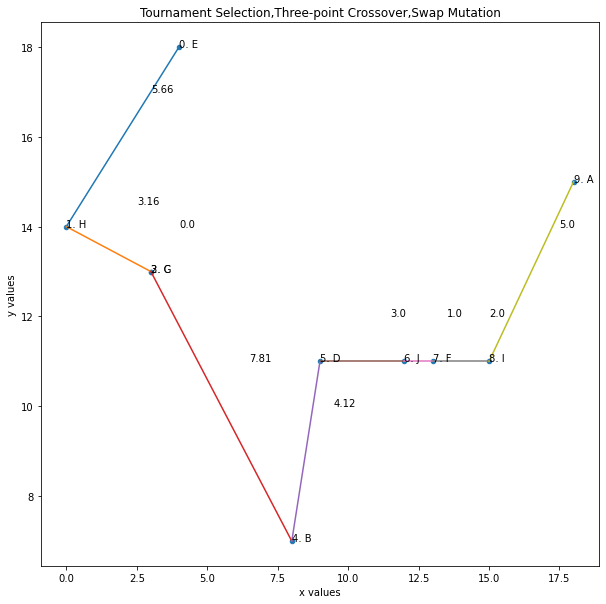

[4, 31.752487211185077, array([['E', 'H', 'C', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


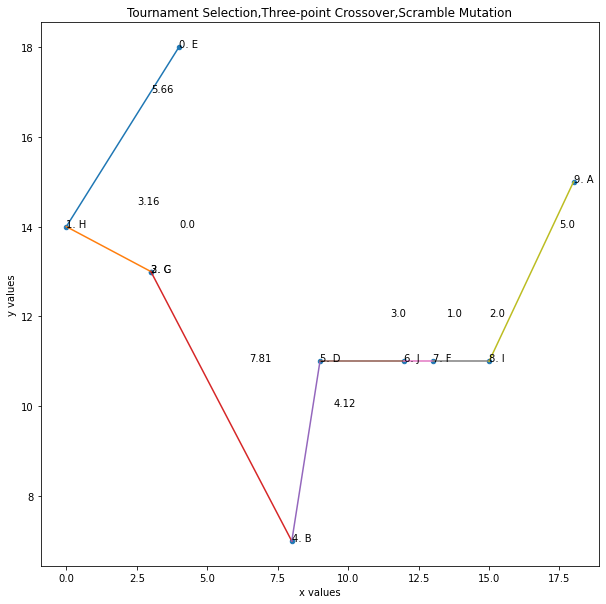

[1958, 34.01454861211347, array([['E', 'C', 'G', 'H', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


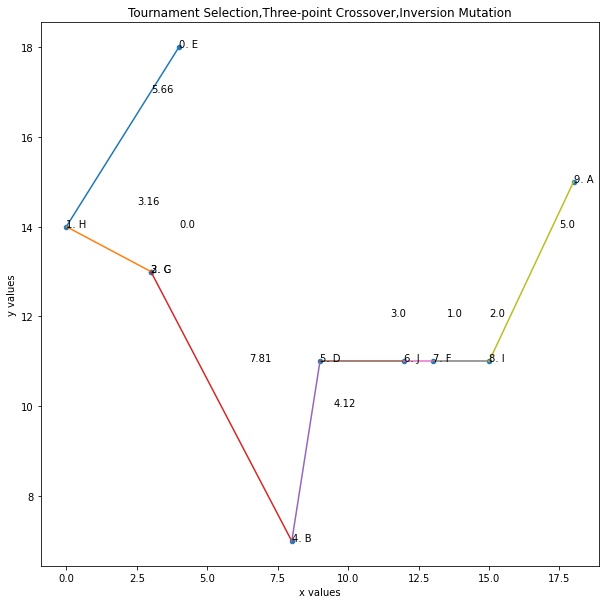

[816, 34.35693013545386, array([['E', 'C', 'H', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


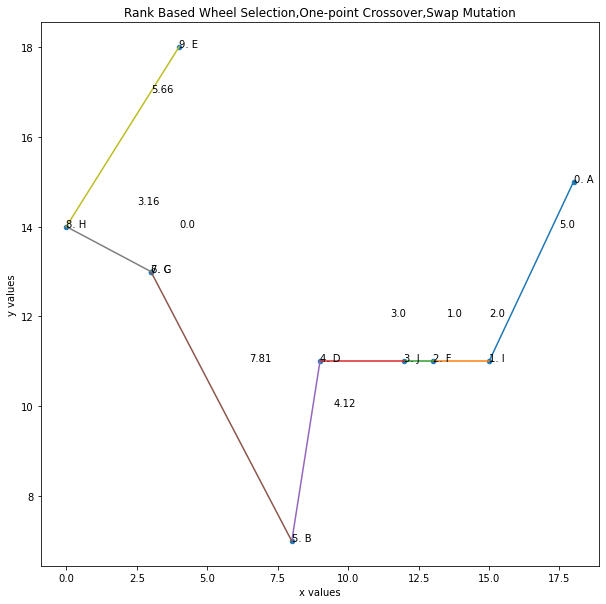

[1387, 31.752487211185073, array([['A', 'I', 'F', 'J', 'D', 'B', 'G', 'C', 'H', 'E']], dtype='<U1')]


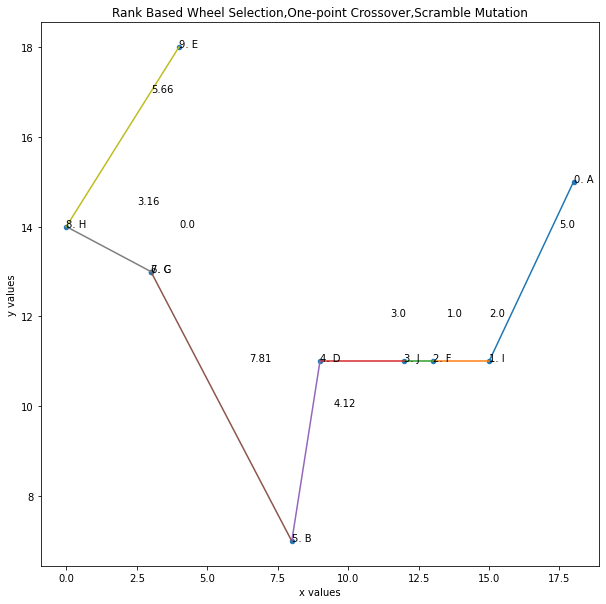

[335, 33.75248721118508, array([['E', 'H', 'C', 'G', 'B', 'D', 'F', 'J', 'I', 'A']], dtype='<U1')]


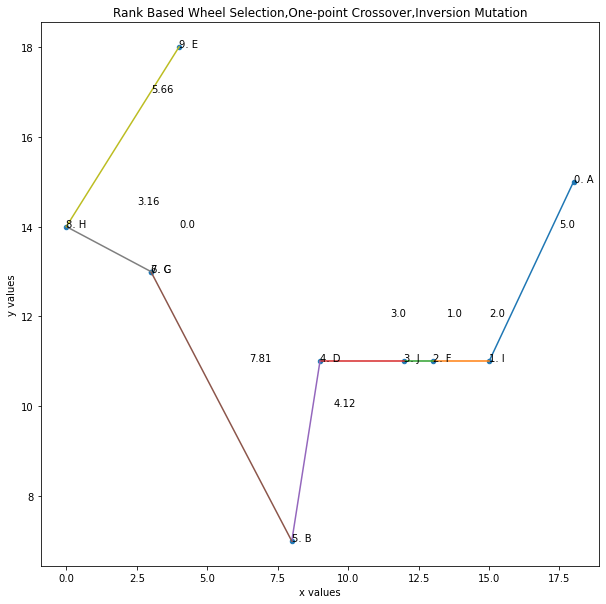

[4, 31.752487211185077, array([['E', 'H', 'C', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


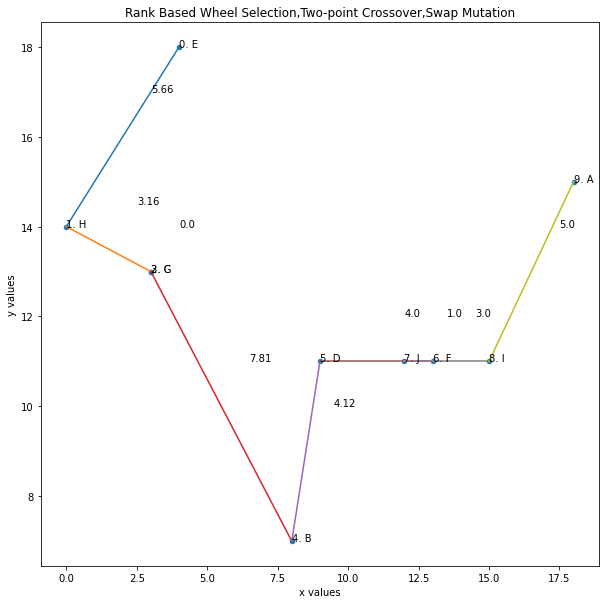

[1958, 34.01454861211347, array([['E', 'C', 'G', 'H', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


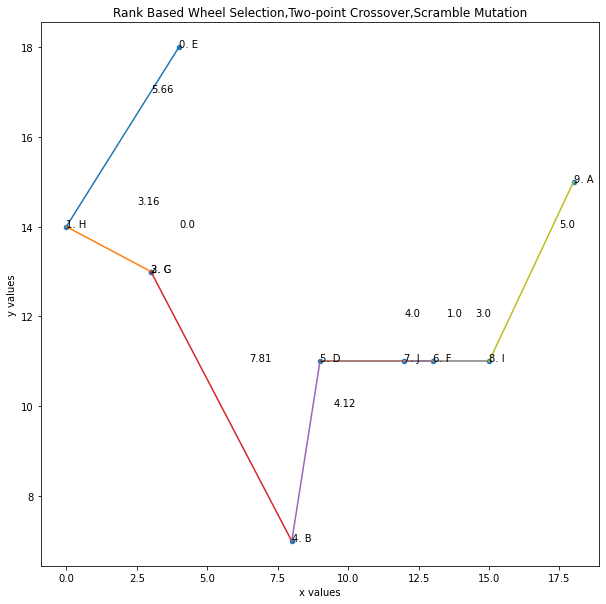

[816, 34.35693013545386, array([['E', 'C', 'H', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


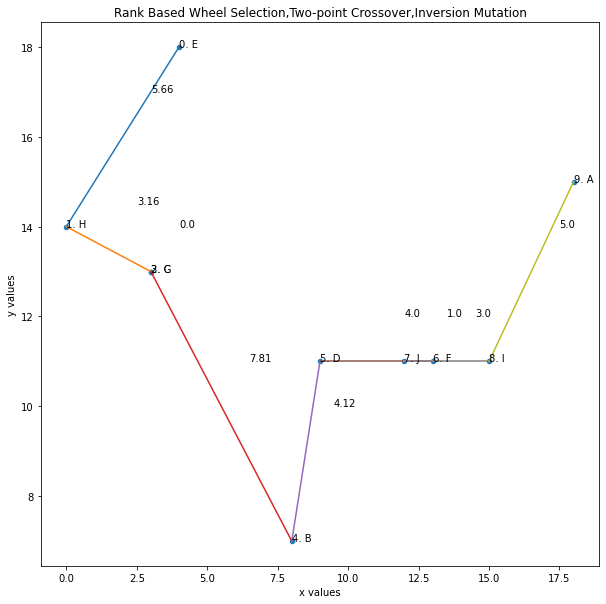

[1731, 31.752487211185077, array([['E', 'H', 'C', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


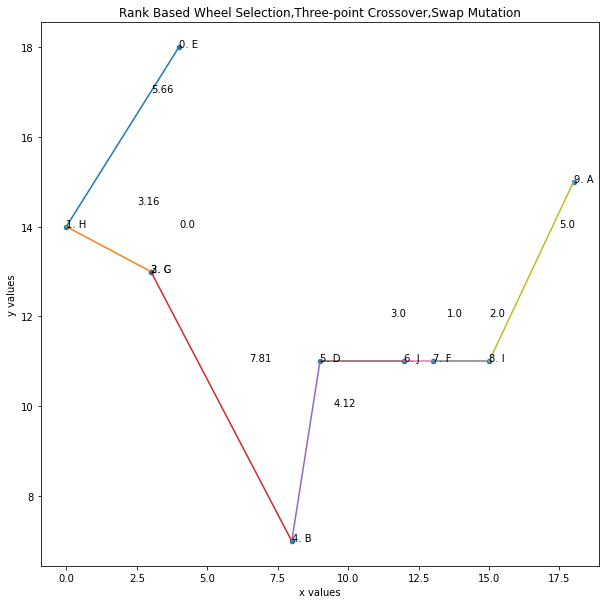

[226, 34.01454861211347, array([['A', 'I', 'F', 'J', 'D', 'B', 'H', 'C', 'G', 'E']], dtype='<U1')]


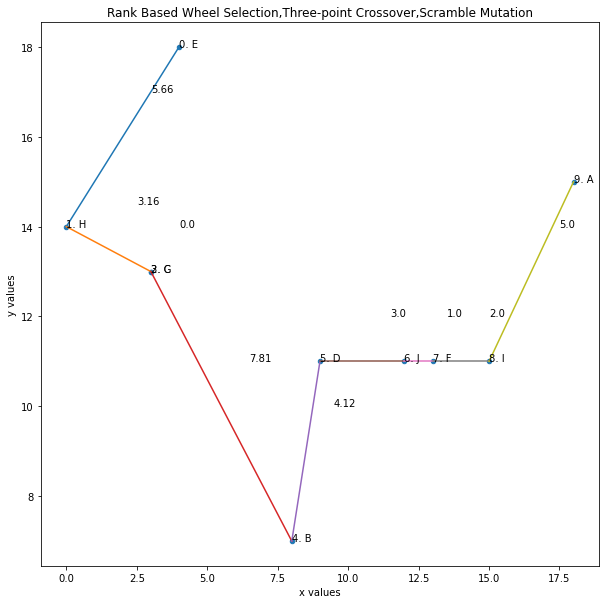

[1162, 32.92364710510756, array([['E', 'H', 'G', 'C', 'D', 'B', 'J', 'F', 'I', 'A']], dtype='<U1')]


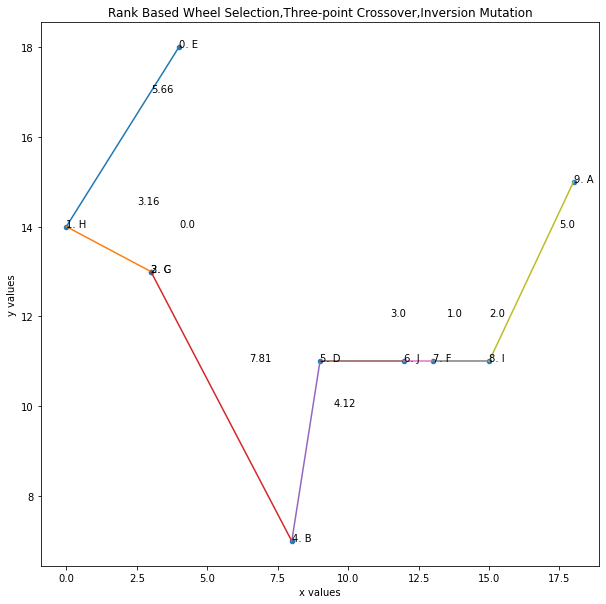

[160, 33.75248721118508, array([['E', 'H', 'C', 'G', 'B', 'D', 'F', 'J', 'I', 'A']], dtype='<U1')]


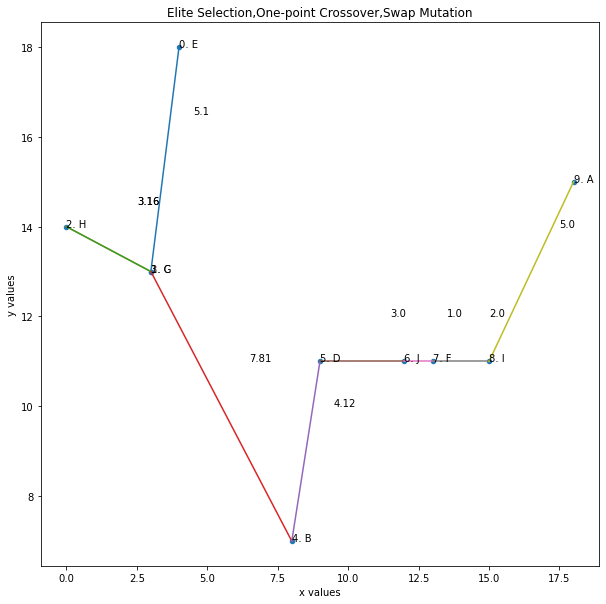

[816, 34.35693013545386, array([['E', 'C', 'H', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


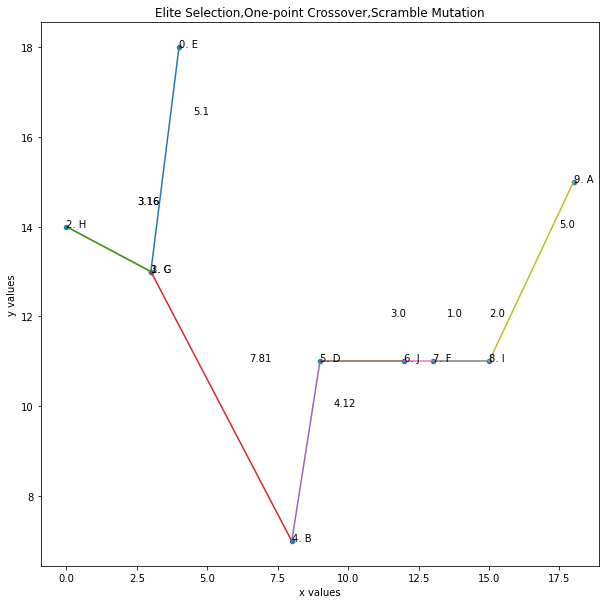

[1731, 31.752487211185077, array([['E', 'H', 'C', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


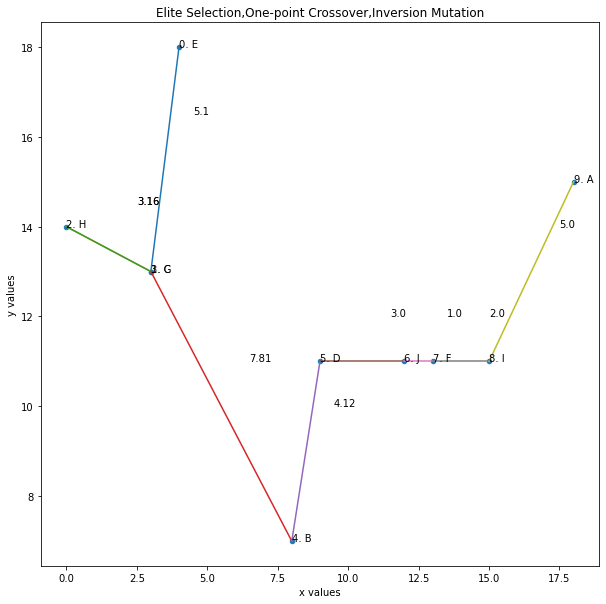

[226, 34.01454861211347, array([['A', 'I', 'F', 'J', 'D', 'B', 'H', 'C', 'G', 'E']], dtype='<U1')]


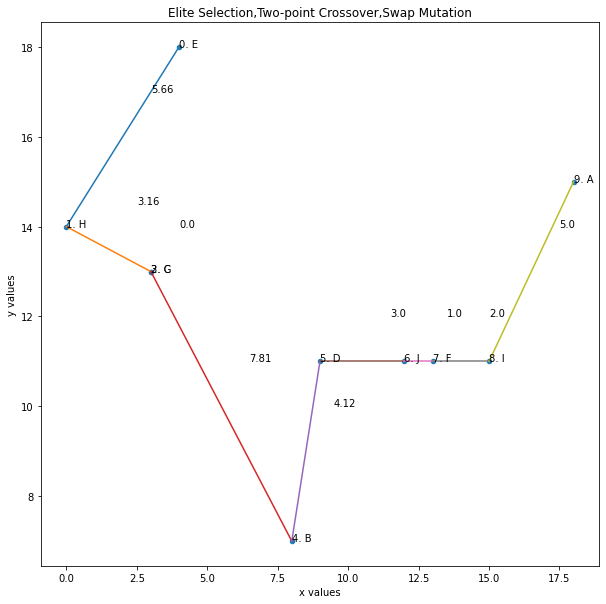

[1162, 32.92364710510756, array([['E', 'H', 'G', 'C', 'D', 'B', 'J', 'F', 'I', 'A']], dtype='<U1')]


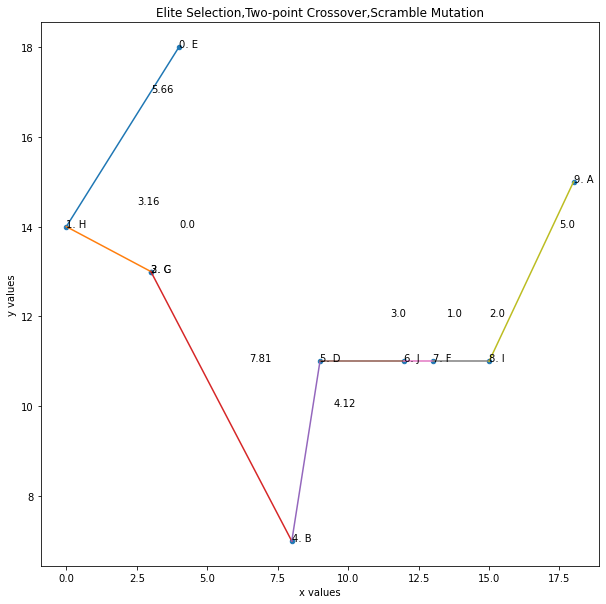

[160, 33.75248721118508, array([['E', 'H', 'C', 'G', 'B', 'D', 'F', 'J', 'I', 'A']], dtype='<U1')]


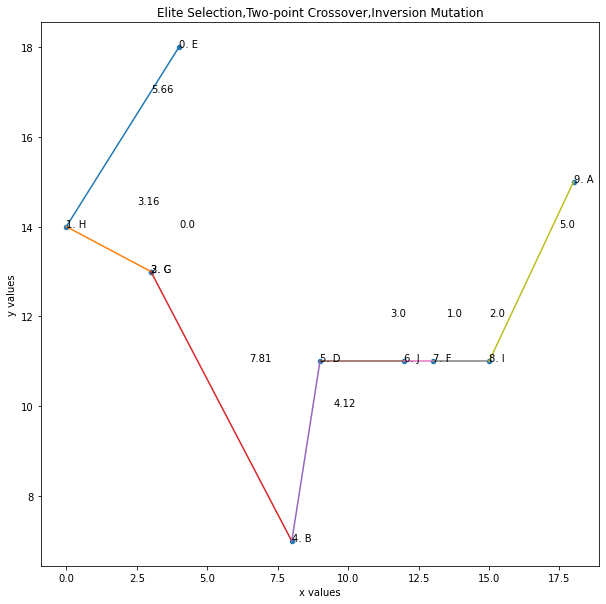

[445, 33.75248721118508, array([['A', 'I', 'J', 'F', 'D', 'B', 'G', 'C', 'H', 'E']], dtype='<U1')]


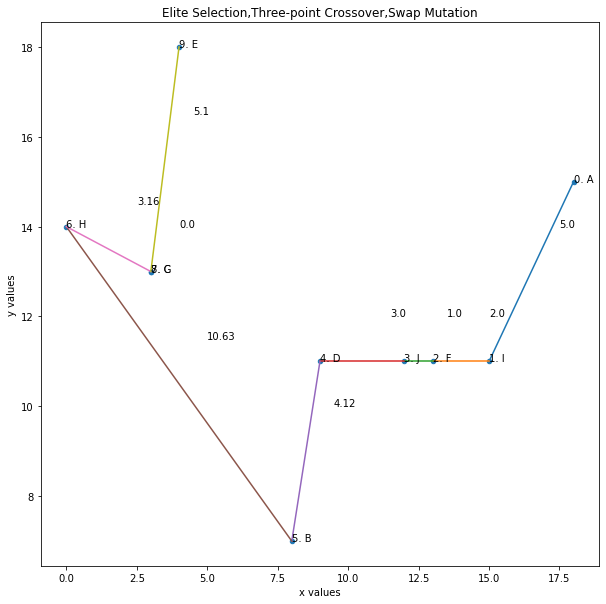

[1612, 34.01454861211347, array([['E', 'G', 'C', 'H', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


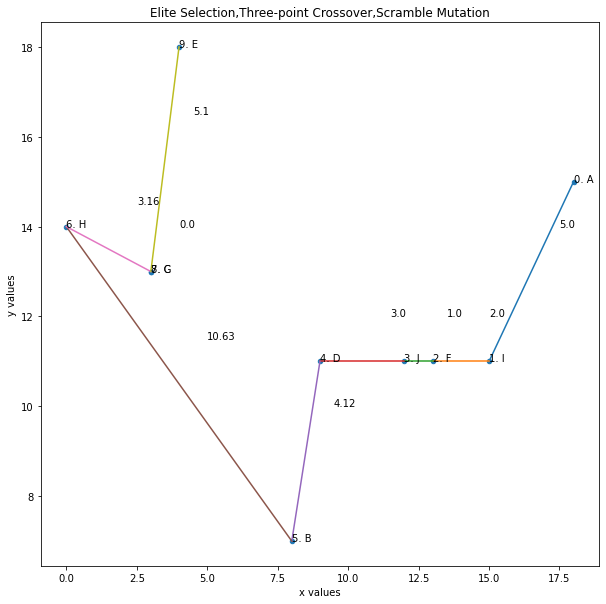

[577, 34.01454861211347, array([['E', 'C', 'G', 'H', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


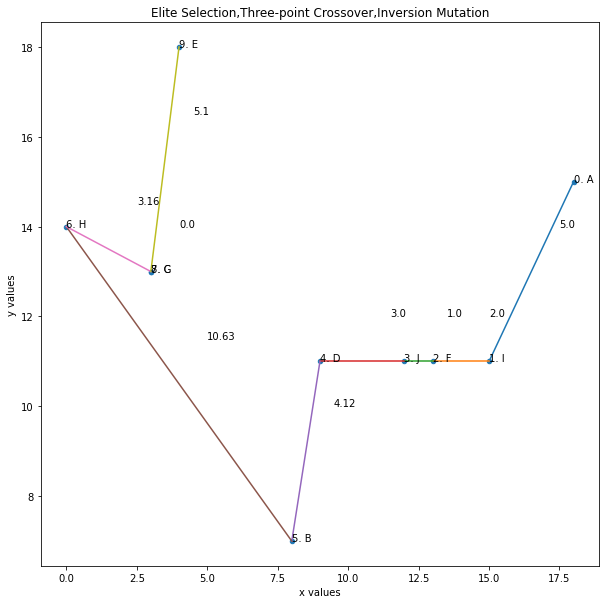

[1035, 34.35693013545386, array([['E', 'G', 'H', 'C', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]


In [20]:
for i in range(len(selection)):
    for j in range(len(crossover)):
        for k in range(len(mutation)):
            title = selection[i]+","+crossover[j]+","+mutation[k]
            draw_map(cities_dict,route = best_solution[i*len(selection)+j][2][0],title = title)
            print(best_solution[i*len(selection)+j*len(crossover)+k])

In [21]:
for i in range(len(selection)):
    for j in range(len(crossover)):
        for k in range(len(mutation)):
            print(f"{selection[i]},{crossover[j]},{mutation[k]}:{best_solution[i*len(selection)+j*len(crossover)+k]}")

Roulette Wheel Selection,One-point Crossover,Swap Mutation:[377, 34.35693013545386, array([['E', 'C', 'H', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]
Roulette Wheel Selection,One-point Crossover,Scramble Mutation:[809, 33.75248721118508, array([['E', 'H', 'G', 'C', 'B', 'D', 'F', 'J', 'I', 'A']], dtype='<U1')]
Roulette Wheel Selection,One-point Crossover,Inversion Mutation:[606, 34.35693013545386, array([['E', 'C', 'H', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]
Roulette Wheel Selection,Two-point Crossover,Swap Mutation:[26, 33.689229064609485, array([['A', 'I', 'F', 'J', 'D', 'B', 'C', 'G', 'E', 'H']], dtype='<U1')]
Roulette Wheel Selection,Two-point Crossover,Scramble Mutation:[721, 31.752487211185077, array([['E', 'H', 'C', 'G', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]
Roulette Wheel Selection,Two-point Crossover,Inversion Mutation:[1859, 34.01454861211347, array([['E', 'G', 'C', 'H', 'B', 'D', 'J', 'F', 'I', 'A']], dtype='<U1')]
Roulette Wheel Selection,Three-p